In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data_url = "https://raw.githubusercontent.com/darkreqnx/leaf-classifier/master/img_dataset.csv?token=AIOJSRNXUP63AVJTN7BI67267RU5I"
df = pd.read_csv(data_url)

In [3]:
df.head(5)

,code,smoothness0,leaflet_desc0,leaflet_desc1,leaflet_desc2,leaflet_desc3,leaflet_desc4,leaflet_desc5,leaflet_desc6,gabor0,gabor1,gabor2,gabor3,gabor4,gabor5,gabor6,gabor7,color0,color1,color2,color3,color4,color5,color6,color7,color8,color9,color10,color11,fft0,fft1,fft2,fft3,fft4,fft5,fft6,fft7,fft8,fft9,fft10,...,geom11,geom12,geom13,geom14,geom15,geom16,geom17,geom18,geom19,geom20,geom21,geom22,geom23,geom24,geom25,geom26,geom27,geom28,geom29,geom30,geom31,geom32,geom33,geom34,geom35,geom36,geom37,geom38,geom39,geom40,geom41,geom42,geom43,geom44,geom45,geom46,geom47,geom48,geom49,geom50
0,0,0.990136,0.293172,5.898140,57.140699,38.832976,239.002092,182.043951,2736.354694,0.767506,0.803687,0.760917,0.733909,0.755205,0.782215,0.795676,0.751683,0.015092,0.005299,0.844378,0.133894,0.000138,0.000211,0.000815,0.000173,0.0,0.000000,0.000000,0,0.070427,0.068695,0.060660,0.049750,0.137163,0.117566,0.008226,0.037063,0.054877,0.036925,0.037894,...,-1.071620,-0.752859,0.611270,-1.097490,0.551494,0.196806,0.154064,0.018376,0.384700,0.095523,0.985284,1.666760,0.908266,1.055867,-1.011291,-0.457053,0.770790,-0.277475,-0.682188,0.551631,-0.746709,-0.328224,0.357519,-0.364019,-0.518048,-0.023039,-0.797469,0.996792,1.399421,-0.012732,0.267327,-1.018589,-0.007033,0.138642,0.389550,0.097027,0.441639,1.124257,0.695187,0.624561
1,0,0.947406,0.337538,6.429441,53.765871,50.358713,207.696895,151.489274,1581.968056,0.941950,0.847207,0.815962,0.808848,0.779815,0.818916,0.846362,0.917206,0.018860,0.012823,0.452758,0.515107,0.000215,0.000000,0.000049,0.000000,0.0,0.000042,0.000147,0,0.081972,0.083511,0.072986,0.054633,0.083010,0.127735,0.045627,0.010247,0.040070,0.048555,0.046960,...,-0.898505,-0.421081,0.889103,-0.878074,0.980123,-0.873983,0.199895,0.110950,0.600093,-0.317701,-0.085417,1.302360,0.220882,0.155951,-1.067050,-0.486090,0.724310,0.610906,-0.156947,-0.667784,-0.189414,-0.328224,-0.551312,0.301024,0.162199,-0.466444,-0.562133,-0.672715,-0.855704,-0.638822,1.355466,-0.573917,-0.396909,-0.366315,0.564329,1.121807,1.548557,1.111618,0.726782,0.565695
2,0,0.960641,0.266033,7.058012,62.578195,53.338541,242.886805,179.513231,2376.196104,0.898163,0.830881,0.805372,0.770342,0.755695,0.769563,0.822595,0.918369,0.014501,0.004747,0.550366,0.430199,0.000166,0.000000,0.000010,0.000000,0.0,0.000000,0.000010,0,0.067323,0.060668,0.053945,0.035244,0.105082,0.127844,0.030847,0.033383,0.066364,0.046371,0.020601,...,-1.047215,-0.670810,0.572735,-0.816224,0.704392,0.078168,-0.196897,0.056299,0.243914,0.248556,1.244132,1.569838,1.067666,1.281215,-1.047111,-0.515518,0.550105,0.045615,-0.687638,0.224539,-0.746709,-0.328224,-0.551312,-0.644368,-0.240554,0.040023,-0.886653,-0.734647,-0.712324,-0.526449,0.841678,-0.103730,-0.243852,-0.452981,0.032249,0.043864,0.544354,1.198798,0.831943,-0.459434
3,0,0.956420,0.227015,4.864612,48.330907,44.045431,216.004630,163.878003,1510.848786,0.797747,0.774420,0.658974,0.650082,0.651573,0.650955,0.668357,0.715309,0.019888,0.004747,0.575858,0.399218,0.000115,0.000000,0.000000,0.000000,0.0,0.000000,0.000175,0,0.093941,0.069459,0.080111,0.020528,0.116983,0.105256,0.050896,0.045107,0.043655,0.060127,0.031633,...,-1.017493,-0.604512,0.830339,-0.953665,1.416105,-0.409719,0.117211,-0.023152,-0.224811,0.568606,0.984145,0.804790,0.607204,-0.341478,-1.037871,-0.475758,0.748974,0.062967,-0.388759,-0.667784,-0.169367,-0.328224,-0.026609,0.020068,0.035388,-0.311361,-0.492448,-0.415298,-0.511806,-0.529879,0.944517,-0.553011,-0.119947,-0.107208,0.073492,0.719025,1.621169,1.107195,0.751325,0.751414
4,0,0.945802,0.229219,5.487981,49.724115,42.011903,179.446371,134.766465,1346.737691,1.057724,0.933728,0.704337,0.651289,0.659790,0.686938,0.714581,0.865413,0.025128,0.008429,0.363056,0.603132,0.000019,0.000037,0.000054,0.000000,0.0,0.000000,0.000146,0,0.089514,0.096912,0.073890,0.043355,0.044485,0.107758,0.090597,0.062963,0.019032,0.027247,0.058747,...,-0.929655,-0.293354,1.549450,-0.998710,2.369302,-1.318394,1.607098,0.153506,0.399876,-0.012222,1.111127

In [4]:
def util_vanilla(base_dataset):
  # stratified train-test split
  # exluding single valued class
  idx_single_val = base_dataset[base_dataset['code'] == 35].index[0]
  trial_dataset = base_dataset.drop([idx_single_val])
  # stratified train-test split
  train, test = train_test_split(trial_dataset, test_size=0.3, stratify=trial_dataset['code'], random_state=0)
  # reintroduce excluded value in train, split into X,y
  train = train.append(base_dataset.iloc[idx_single_val])
  # random train-test split
  # train, test = train_test_split(trial_dataset, test_size=0.3, random_state=0)
  X_train = train.drop(['code'], axis=1)
  y_train = train['code']
  X_test = test.drop(['code'], axis=1)
  y_test = test['code']
  return X_train, y_train, X_test, y_test

def vanilla_Dt_classf(base_dataset):
  X_train, y_train, X_test, y_test = util_vanilla(base_dataset)
  # decision tree classf
  tree_clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=23)
  tree_clf = tree_clf.fit(X_train, y_train)
  y_predict_tree = tree_clf.predict(X_test)
  # check score
  print("decision tree classifier:", accuracy_score(y_test, y_predict_tree))
  return tree_clf

def vanilla_Rf_classf(base_dataset):
  X_train, y_train, X_test, y_test = util_vanilla(base_dataset)
  # random forest classf
  rf_clf = RandomForestClassifier(criterion="entropy", random_state=23, n_jobs=-1)
  rf_clf.fit(X_train, y_train)
  y_predict_rf = rf_clf.predict(X_test)
  # check score  
  print("random forest classifier:", accuracy_score(y_test, y_predict_rf))
  return rf_clf

In [5]:
# run the classifiers out of the box

tree_clf = vanilla_Dt_classf(df)
rf_clf = vanilla_Rf_classf(df)

decision tree classifier: 0.6985151710781149
random forest classifier: 0.921885087153002


# feature selection: using Dt and Rf feat. importances

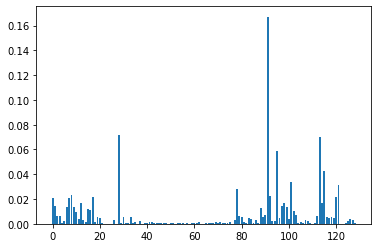

In [6]:
# feature importance - decision tree

importance = tree_clf.feature_importances_
# summarize feature importance
# for i,v in enumerate(importance):
	# print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [7]:
# shortlist x% cumulative importance

tree_feature_importance = pd.DataFrame({'tree_feature':list(df.columns[1:]),'importance':list(importance)})
tree_feature_importance = tree_feature_importance.sort_values('importance', ascending=False).reset_index()
tree_feature_importance['cumulative'] = tree_feature_importance['importance'].cumsum()

for thresh in [0.75,0.8,0.85,0.9,0.95,1.0]:
  shortlist = tree_feature_importance[tree_feature_importance['cumulative'] <= thresh]
  print("shortlisting top", thresh*100, "% features...")
  df_tree_imp = df[['code'] + list(shortlist['tree_feature'])]
  dum_clf = vanilla_Dt_classf(df_tree_imp)
  print("..............")

shortlisting top 75.0 % features...
decision tree classifier: 0.7075532601678503
..............
shortlisting top 80.0 % features...
decision tree classifier: 0.7043253712072305
..............
shortlisting top 85.0 % features...
decision tree classifier: 0.7049709489993544
..............
shortlisting top 90.0 % features...
decision tree classifier: 0.7204648160103292
..............
shortlisting top 95.0 % features...
decision tree classifier: 0.7017430600387347
..............
shortlisting top 100.0 % features...
decision tree classifier: 0.6959328599096191
..............


In [13]:
tree_feature_importance.tail(50)

,index,tree_feature,importance,cumulative
79,60,fft32,0.000792,0.984421
80,74,fft46,0.000722,0.985142
81,85,geom7,0.000703,0.985845
82,55,fft27,0.000669,0.986514
83,65,fft37,0.000658,0.987172
84,61,fft33,0.000638,0.987811
85,29,fft1,0.000613,0.988424
86,111,geom33,0.000595,0.989019
87,109,geom31,0.000582,0.989601
88,39,fft11,0.000569,0.990170


In [8]:
thresh_final = float(input("best threshold (out of 1.0): "))

shortlist = tree_feature_importance[tree_feature_importance['cumulative'] <= thresh_final]
df_tree = df[['code'] + list(shortlist['tree_feature'])]

best threshold (out of 1.0): 0.9


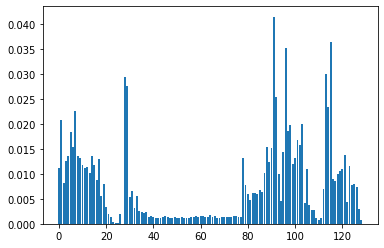

In [9]:
# feature importance - random forest

importance = rf_clf.feature_importances_
# summarize feature importance
# for i,v in enumerate(importance):
	# print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [10]:
# shortlist x% cumulative importance

rf_feature_importance = pd.DataFrame({'rf_feature':list(df.columns[1:]),'importance':list(importance)})
rf_feature_importance = rf_feature_importance.sort_values('importance', ascending=False).reset_index()
rf_feature_importance['cumulative'] = rf_feature_importance['importance'].cumsum()

for thresh in [0.75,0.8,0.85,0.9,0.95,1.0]:
  shortlist = rf_feature_importance[rf_feature_importance['cumulative'] <= thresh]
  print("shortlisting top", thresh*100, "% features...")
  df_rf_imp = df[['code'] + list(shortlist['rf_feature'])]
  dum_clf = vanilla_Rf_classf(df_rf_imp)
  print("..............")

shortlisting top 75.0 % features...
random forest classifier: 0.9160748870238864
..............
shortlisting top 80.0 % features...
random forest classifier: 0.9302775984506133
..............
shortlisting top 85.0 % features...
random forest classifier: 0.9380245319561007
..............
shortlisting top 90.0 % features...
random forest classifier: 0.9367333763718528
..............
shortlisting top 95.0 % features...
random forest classifier: 0.9309231762427372
..............
shortlisting top 100.0 % features...
random forest classifier: 0.9173660426081343
..............


In [14]:
rf_feature_importance.tail(50)

,index,rf_feature,importance,cumulative
79,26,color10,0.001918,0.940162
80,64,fft36,0.001696,0.941858
81,45,fft17,0.001585,0.943443
82,74,fft46,0.001520,0.944963
83,66,fft38,0.001502,0.946465
84,61,fft33,0.001490,0.947955
85,39,fft11,0.001485,0.949441
86,58,fft30,0.001483,0.950923
87,75,fft47,0.001481,0.952404
88,60,fft32,0.001470,0.953874


In [15]:
thresh_final = float(input("best threshold (out of 1.0): "))

shortlist = rf_feature_importance[rf_feature_importance['cumulative'] <= thresh_final]
df_rf = df[['code'] + list(shortlist['rf_feature'])]

best threshold (out of 1.0): 0.85


# hyperparameter tuning: gridsearchCV, for both


In [35]:
# grid search for decision tree
s_plit = [x for x in range(2,11)]
l_eaf = [x for x in range(1,11)]

params = {'max_features': [None, 'auto', 'sqrt', 'log2'],
          'criterion':["entropy"],
          'min_samples_split':s_plit, # controls overfitting, also depth of tree
          'min_samples_leaf':l_eaf, # controls overfitting, leaves need not have zero entropy
          'random_state':[23]}

X_train_tree, y_train_tree, X_test_tree, y_test_tree = util_vanilla(df_tree)

grid_tree = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=params, verbose=3, n_jobs=-1)
grid_tree.fit(X_train_tree, y_train_tree)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 1564 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 14.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         '

In [45]:
print("best hyperparams: ", grid_tree.best_params_)
print(grid_tree.best_estimator_)

print("\n")

print("Train set")
tree_pred_train = grid_tree.predict(X_train_tree)
print("Accuracy:",accuracy_score(y_train_tree, tree_pred_train))

print(".......................")

print("Test set")
tree_pred_test = grid_tree.predict(X_test_tree)
print("Accuracy:",accuracy_score(y_test_tree, tree_pred_test))

best hyperparams:  {'criterion': 'entropy', 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 23}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=23, splitter='best')


Train set
Accuracy: 1.0
.......................
Test set
Accuracy: 0.7204648160103292


In [46]:
print(classification_report(y_train_tree, tree_pred_train))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        39
         1.0       1.00      1.00      1.00        48
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        23
         4.0       1.00      1.00      1.00        21
         5.0       1.00      1.00      1.00        10
         6.0       1.00      1.00      1.00         8
         7.0       1.00      1.00      1.00        15
         8.0       1.00      1.00      1.00        36
         9.0       1.00      1.00      1.00        32
        10.0       1.00      1.00      1.00        16
        11.0       1.00      1.00      1.00        14
        12.0       1.00      1.00      1.00        46
        13.0       1.00      1.00      1.00        50
        14.0       1.00      1.00      1.00         3
        15.0       1.00      1.00      1.00        11
        16.0       1.00      1.00      1.00        41
        17.0       1.00    

In [47]:
print(classification_report(y_test_tree, tree_pred_test))

              precision    recall  f1-score   support

         0.0       0.47      0.41      0.44        17
         1.0       0.64      0.67      0.65        21
         2.0       0.67      0.77      0.71        13
         3.0       0.50      0.40      0.44        10
         4.0       0.57      0.44      0.50         9
         5.0       0.67      0.50      0.57         4
         6.0       0.25      0.25      0.25         4
         7.0       0.33      0.43      0.38         7
         8.0       0.80      0.80      0.80        15
         9.0       0.92      0.85      0.88        13
        10.0       0.40      0.29      0.33         7
        11.0       0.33      0.33      0.33         6
        12.0       0.60      0.79      0.68        19
        13.0       0.88      0.68      0.77        22
        14.0       0.00      0.00      0.00         1
        15.0       0.12      0.20      0.15         5
        16.0       0.76      0.76      0.76        17
        17.0       0.78    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
# grid search for random forest
params = {'criterion':["entropy"],
 'n_estimators':[90,100,110,120], # how many trees to consider
 'min_samples_split':[2, 3, 4, 5, 6, 7, 8, 9], # every indiv tree: controls overfitting, also depth of tree
 'min_samples_leaf':[1, 2, 3, 4, 5], # every indiv tree: controls overfitting, leaves need not have zero entropy
 'random_state':[23],
 'n_jobs':[-1]}

X_train_rf, y_train_rf, X_test_rf, y_test_rf = util_vanilla(df_rf)

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=3, n_jobs=-1, verbose=3)
grid_rf.fit(X_train_rf, y_train_rf)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 58.2min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 96.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [58]:
print("best hyperparams: ", grid_rf.best_params_)
print(grid_rf.best_estimator_)

print("\n")

print("Train set")
rf_pred_train = grid_rf.predict(X_train_rf)
print("Accuracy:",accuracy_score(y_train_rf, rf_pred_train))

print(".......................")

print("Test set")
rf_pred_test = grid_rf.predict(X_test_rf)
print("Accuracy:",accuracy_score(y_test_rf, rf_pred_test))

best hyperparams:  {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 110, 'n_jobs': -1, 'random_state': 23}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=110,
                       n_jobs=-1, oob_score=False, random_state=23, verbose=0,
                       warm_start=False)


Train set
Accuracy: 1.0
.......................
Test set
Accuracy: 0.9373789541639768


In [59]:
print(classification_report(y_train_rf, rf_pred_train))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        39
         1.0       1.00      1.00      1.00        48
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        23
         4.0       1.00      1.00      1.00        21
         5.0       1.00      1.00      1.00        10
         6.0       1.00      1.00      1.00         8
         7.0       1.00      1.00      1.00        15
         8.0       1.00      1.00      1.00        36
         9.0       1.00      1.00      1.00        32
        10.0       1.00      1.00      1.00        16
        11.0       1.00      1.00      1.00        14
        12.0       1.00      1.00      1.00        46
        13.0       1.00      1.00      1.00        50
        14.0       1.00      1.00      1.00         3
        15.0       1.00      1.00      1.00        11
        16.0       1.00      1.00      1.00        41
        17.0       1.00    

In [60]:
print(classification_report(y_test_rf, rf_pred_test))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89        17
           1       0.91      0.95      0.93        21
           2       0.93      1.00      0.96        13
           3       1.00      0.90      0.95        10
           4       1.00      0.89      0.94         9
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         4
           7       0.75      0.86      0.80         7
           8       1.00      0.93      0.97        15
           9       0.93      1.00      0.96        13
          10       1.00      0.57      0.73         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        19
          13       0.91      0.95      0.93        22
          14       0.00      0.00      0.00         1
          15       0.83      1.00      0.91         5
          16       1.00      0.94      0.97        17
          17       0.88    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
